# Using the COERbuoy platform with jupyter
## Waves and evaluation

>Functions defined in **simulation.py**. 

When evaluating WECs in numerical situation we are normally not interested in the transition process, but when in setady state. The meaurement should therefore start after the steady-state is reached.
the COERbuoy platform starts measuring the absorbed power from time t=0. Negatives values are not considered. Additionally an end time $t_e$ can be set to skip for example effects of windowing. The last value in the csv file data is assumed to be t_e.
When creating a wave with the built in function reg_wave or bretschneider_wave not 

Regular wave
The first and last value of the csv data is the end time of the simulation:
           time  wave-elevation
0    -48.000000        0.500000
1    -47.920423        0.498265
2    -47.840845        0.493072
3    -47.761268        0.484456
4    -47.681690        0.472478
...         ...             ...
1203  47.731698        0.480394
1204  47.811276        0.490267
1205  47.890853        0.496738
1206  47.970431        0.499760
1207  42.000000       -0.128693

[1208 rows x 2 columns]
The total length of the wave data and the area used for evaluation:


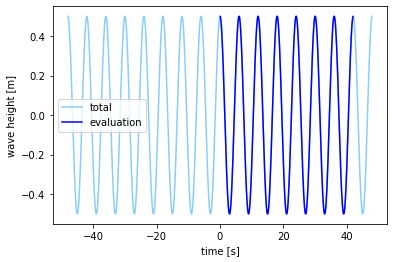

In [32]:
from COERbuoy import reg_wave;
import matplotlib.pyplot as plt;
import pandas;

#Creates a regular wave with wave height 1 m and wave period 6 s
w1=reg_wave(1,6);
#that we save to a file:
w1.to_file("test_wave.csv");

#Lets plot the wave file we created
file=pandas.read_csv("test_wave.csv");
#First print the first five values in a table
print("The first and last value of the csv data is the end time of the simulation:");
print(file);
data=file.to_numpy();
#Then plot the time series of the total wave
plt.plot(data[:-1,0],data[:-1,1],color="lightskyblue");

#Additionally plot the time were the evaluation process is carried out.
print("The total length of the wave data and the area used for evaluation:");
start=np.where(data[:,0]>-0.002)[0][0];
end  =np.where(data[:,0]>data[-1,0])[0][0];
plt.plot(data[start:end,0],data[start:end,1],color="b");
plt.legend(["total","evaluation"]);
plt.ylabel("wave height [m]");
plt.xlabel("time [s]");

### Creating waves for COERbuoy
There are several ways to create a wave: 1) creating a csv data, 2) using the command line interface of 3) using python code.

1.  The csv file has the format:  

    t_1,w_1  
    t_2,w_2  
    t_3,w_3  
    ...,...  

    where t_x is the time and w_x the coreesponding wave elevation.
    

2.  The command line interface can be used from a terminal, comand promt:
    >python3 -m COERbuoy --regular_wave H p filename control  

    or  

    >py -m COERbuoy --regular_wave H p filename control  
    

3.  Examples to create a wave using python is shown below (functions defined in **simulation.py**):

Regular wave
Regular wave


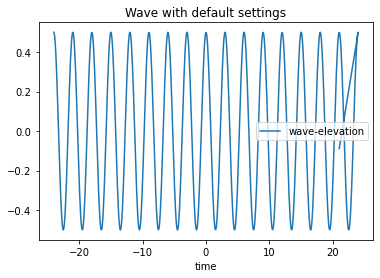

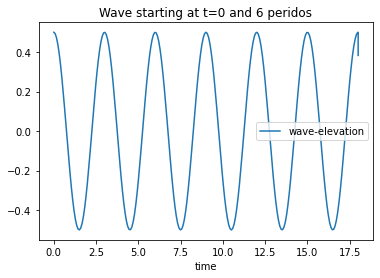

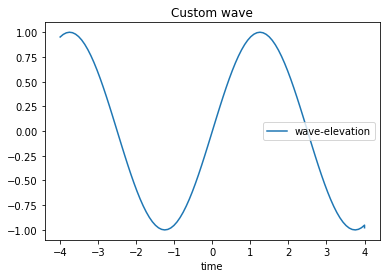

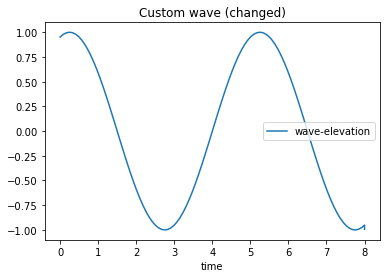

In [18]:
from COERbuoy import start_simu, reg_wave, bretschneider_wave;
import COERbuoy;
import numpy as np;
import pandas;

##Creating a regular wave with defualt settings
w=reg_wave(1,3);# 1m wave with 6s wave period
w.to_file("test_wave.csv")
pandas.read_csv("test_wave.csv").plot(x="time",title="Wave with default settings");
#Start simulation (oucommented)
#start_simu(wave=w,control="none");


#Creating a regular wave with 6 periods and starting at 0
w=reg_wave(1,3,n0=0,n=6,ne=0);# 1m wave with 6s wave period,
                              # starting at 0 (n0=0)
                              # and ending after six periods (n=6)
                              # with no end trsanistion time (ne=0)
w.to_file("test_wave.csv")
pandas.read_csv("test_wave.csv").plot(x="time",title="Wave starting at t=0 and 6 peridos");
#Start simulation (oucommented)
#start_simu(wave=w,control="none");


##Creating a wave from a time series
t=np.linspace(-4,4,100);
y=np.sin(t*0.2*6.28);
w=COERbuoy.simulation.wave_series.fromLists(t,y,"my own wave");
w.to_file("test_wave.csv")
pandas.read_csv("test_wave.csv").plot(x="time",title="Custom wave");
#Start simulation (oucommented)
#start_simu(wave=w,control="none");

##Read from file
w=COERbuoy.simulation.wave_series.fromFile("test_wave.csv");
w.t=w.t-w.t0;
w.te=w.t[-1];
w.to_file("test_wave2.csv")
pandas.read_csv("test_wave2.csv").plot(x="time",title="Custom wave (changed)");
#Start simulation (oucommented)
#start_simu(wave=w,control="none");

## Analysing COERbuoy output with the analyzer class
>Main functionality defined in **analyzer.py**.  
### Single file

In [35]:
from COERbuoy import start_simu, reg_wave;
import COERbuoy.utils as u;
import numpy as np;

u.set_settings("WECfolder","[data.COERsimple]");#select WEC model
start_simu(wave=reg_wave(1,4,n0=1,ne=0),control="linear", name="test_simulation.csv");

Regular wave
Using the following WEC: /home/gast/Dokumente/github/COERbuoy/COERbuoy/data/COERsimple
Using the following angular wave frequencies: [rad/s],[m]
0.17, 0.003589201509169877
0.35, 0.0037278623520017964
0.52, 0.003984437279286646
0.7, 0.004409372666159305
0.87, 0.00511022278280432
1.05, 0.0063426998589276844
1.22, 0.008872311529089644
1.4, 0.016440477024030252
1.57, 0.5000464875922072
1.75, 0.0156800156248781
1.92, 0.007325473494083035
2.09, 0.004625039715475884
2.27, 0.003301415486244649
2.44, 0.002521554735677352
2.62, 0.0020109834331946
2.79, 0.0016529461118105976
2.97, 0.0013894093166962756
3.14, 0.0011883037025480837
LUT table h spacing: -4.05: 0.45 : 3.6
LUT table p spacing: 0: 0.0 : 0


Running the simulation...
Elapsed time :39.74130940437317

Mean absorbed power: 5.55 kW


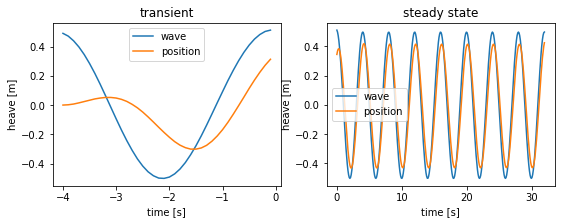

In [60]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;
lyser=l.Analyzer();
[transient,steadystate]=lyser.read_file("test_simulation.csv");
#return an array with:
#[:,0] time
#[:,1] wave
#[:,2] position heave
#[:,3] velocity heave
#[:,4] angle
#[:,5] angle velocity
# ....
#[:,-1] absorbed power


plt.figure(figsize=(9,3))

plt.subplot(1,2,1);
plt.plot(transient[0,:].transpose(),transient[1:3,:].transpose());
plt.legend(["wave","position"]);
plt.ylabel("heave [m]");
plt.xlabel("time [s]");
plt.title("transient");

plt.subplot(1,2,2);
plt.plot(steadystate[0,:].transpose(),steadystate[1:3,:].transpose());
plt.legend(["wave","position"]);
plt.ylabel("heave [m]");
plt.xlabel("time [s]");
plt.title("steady state");
#read the output file

### Datasets of multiple files

In [62]:
from COERbuoy import start_simu, reg_wave;
import COERbuoy.utils as u;
import numpy as np;
import os;

os.mkdir("test_data")

u.set_settings("WECfolder","[data.COERsimple]");#select WEC model

for p in [3,4,5]:
    for h in [1,3]:
        start_simu(wave=reg_wave(h,p,n0=1,ne=0),control="linear", name="test_data");

Regular wave
Using the following WEC: /home/gast/Dokumente/github/COERbuoy/COERbuoy/data/COERsimple
Using the following angular wave frequencies: [rad/s],[m]
0.23, 0.0050676574573209525
0.47, 0.0052624838457354505
0.7, 0.00562286846845529
0.93, 0.006219395699267605
1.16, 0.007202339013440482
1.4, 0.008928131889617998
1.63, 0.012459279138532989
1.86, 0.02293653701486073
2.09, 0.4995785881325979
2.33, 0.022448546474388393
2.56, 0.010409655512128848
2.79, 0.00655416951200188
3.03, 0.004670723242564819
LUT table h spacing: -4.05: 0.45 : 3.6
LUT table p spacing: 0: 0.0 : 0


Running the simulation...
Elapsed time :29.83416509628296

Mean absorbed power: 3.19 kW
Regular wave
Using the following WEC: /home/gast/Dokumente/github/COERbuoy/COERbuoy/data/COERsimple
Using the following angular wave frequencies: [rad/s],[m]
0.23, 0.015202972371962846
0.47, 0.015787451537206402
0.7, 0.01686860540536587
0.93, 0.018658187097802793
1.16, 0.02160701704032145
1.4, 0.02678439566885399
1.63, 0.037377837415

The first two lines of the data set:
              P   z075   z095  dz075  alpha075  dalpha075       RAO    wtype  \
0  36128.362531  1.308  2.826  1.626         0          0  0.790698  regular   
0  35206.418368  0.820  1.628  1.617         0          0  0.499459  regular   

     p     h     wave    ctrl         WEC     omega         k     k_rel  \
0  5.0  3.44  regular  linear  COERsimple  1.256000  0.171845  0.171845   
0  3.0  3.70  regular  linear  COERsimple  2.093333  0.477347  0.477347   

            model                                               data  
0  FloaterFKRADAM  [[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,...  
0  FloaterFKRADAM  [[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,...  


The (complete) filtered data set:
             P   z075   z095  dz075  alpha075  dalpha075       RAO    wtype  \
0  3959.972932  0.432  0.933  0.544         0          0  0.794737  regular   
0  5548.696834  0.408  0.857  0.647         0          0  0.723729  regular   
0  3192.31

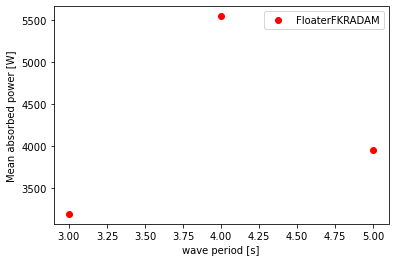

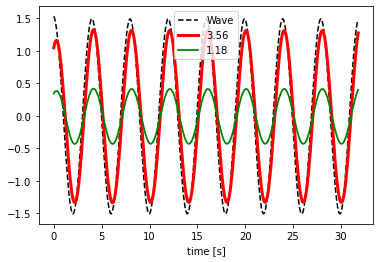

In [1]:
import COERbuoy.analyzer as l;
import matplotlib.pyplot as plt;

lyser=l.Analyzer();
print("The first two lines of the data set:")
lyser.read_folder("test_data")
print(lyser.get_set()[:2]);

#explanation of values: P-Power, RAO-Response Amplitude Operator, wtype- wave type,
# .... p - period, h - wave height, ctrl - controller, WEC - WEC model, omega - wave frequency, k - wave number
# .... data - time domain data, z0xy - 0.xy quartil etc. 

#get data set:
#wave_type(wtype), wave_period(p), wave_height(H), control_name(ctrl), WEC_name(WEC), hydrodynamic_model(model)
filtered_data_set=lyser.get_set(wtype="regular",H=1.02);
print("\n\nThe (complete) filtered data set:")
print(filtered_data_set);

#Plot the data
#xaxis, yaxis, group by, data_set
lyser.plot("p","P","model",filtered_data_set) #Plot absorbed power (P)
                                              #over period (p)
                                              #group by hydro. model (no effect here)

        
filtered_data_set=lyser.get_set(wtype="regular",p=4);        
#Time plot
#xaxis, yaxis, group by, data_set
lyser.plot_time(2,"h",filtered_data_set)

## Getting parameters with the parameters class
> Functionality defined in **Parameters.py**.

LUT table h spacing: -4.05: 0.45 : 3.6
LUT table p spacing: 0: 0.0 : 0

LUT table h spacing: -4.05: 0.45 : 3.6
LUT table p spacing: 0: 0.0 : 0

The optimal damping for p=6 is 274764.72 Ns/m.
The (undamped) eigenperiod is 3.92 s.


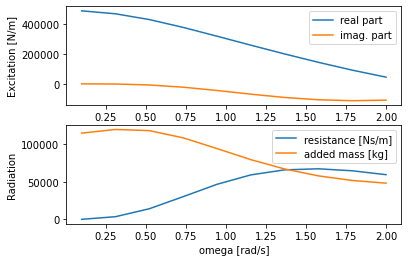

In [22]:
import matplotlib.pyplot as plt;
import COERbuoy.Parameters;
import numpy as np;

#Choose the WEC and hydrodynamic model for which the hydrodynamic parameters are calculated
#When using None for both, the global setting will be used
param = COERbuoy.Parameters.parameters("[data.COERsimple]","Floater_BEM");
omega=np.linspace(0.1,2,10);#Select the wave frequencies
param.init_hydro(omega); #initialize the parameetr module with the frequencies

hydro_params=param.hydro(0,1,1);#usage: params.hydro(submergence=0,mode1=1(heave,mode2=1(heave))
                                #returns: [buoyancy, excitation, rad. impedande, added mass at inf.]
    
excitation_real     = hydro_params[1].real;
excitation_imag     = hydro_params[1].imag;
radiation_resistance= hydro_params[2].real;
added_mass          = hydro_params[2].imag;
plt.subplot(2,1,1)
plt.plot(omega,np.transpose([excitation_real,excitation_imag]));
plt.xlabel("omega [rad/s]")
plt.ylabel("Excitation [N/m]")
plt.legend(["real part","imag. part"])
plt.subplot(2,1,2)
plt.plot(omega,np.transpose([radiation_resistance,added_mass]));
plt.xlabel("omega [rad/s]")
plt.ylabel("Radiation")
plt.legend(["resistance [Ns/m]","added mass [kg]"])

#Calculate optimal damping for p=6s
p=6;
omega=6.28/p;
param.init_hydro([omega]);
[m,d,c]=param.mdc(0);#get mass, damping and stiffness in heave at mean (0) position
X=float(m)*omega-float(c)/omega;#Calculate the reactance
d_opt=1*(float(d)**2+X**2)**0.5;#and the optimal damping
print("The optimal damping for p="+str(p)+" is "+str(np.round(d_opt,2))+" Ns/m.")

#Calculate a (guess) for the undamped eigenfrequency
eigenperiod=6.28/np.sqrt(c/m)[0];
print("The (undamped) eigenperiod is "+str(np.round(eigenperiod,2))+" s.")
